# IBM Data Science Professional Specialization - Coursera
## Clustering Neighbourhood in Pune
#### - Harsh Gupta


# 1.Description of The Project
## Introduction

Pune is the second largest city in the Indian state of Maharashtra, after Mumbai. It is the ninth most populous city in the country with an estimated population of 3.13 million.Along with its extended city limits Pimpri Chinchwad and the three cantonment towns of Pune, Khadki and Dehu Road, Pune forms the urban core of the eponymous Pune Metropolitan Region (PMR).According to the 2011 census, the urban area has a combined population of 5.05 million while the population of the metropolitan region is estimated at 7.27 million.The city is considered to be the cultural capital of Maharashtra.It is also known as the "Oxford of the East" due to the presence of several well-known educational institutions.The city has emerged as a major educational hub in recent decades, with nearly half of the total international students in the country studying in Pune.Research institutes of information technology, education, management and training attract students and professionals from India and overseas. Several colleges in Pune have student-exchange programmes with colleges in Europe.In the last decade, the city has also seen an IT boom and many companies have their officies set up here.For this reason there has been in increase in population and hence the housing property has also increased drastically. There are some particular Neighbourhood which have their prices higher than other.



### Question to be solved
In this project we will try to find the reason and draw conclusion as to why those neighbourhood have higher prices,what are the reason influencing the rates of the flats and houses.

The results from this project will help the house buyers to see what price they can expect for a particular neighbourhood.
Also it will help the house buyer to look for a neighbourhood with particular requirements.


# 2.Description of Data
The data that will be used for this project will be from following sources:
<ul>
    <li> Names of the Neighbourhood https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Pune
    <li> The venues in each neighborhood. (FourSquare API) 
    <li> The average price of each neighbourhood. https://www.99acres.com/property-rates-and-price-trends-in-pune    

</ul>

Other supporting data :
<ul>
    <li> Coordinates (Geocoder Python)
    <li> GeoJson (http://data.beta.nyc)  
</ul>

*The price per sqt feet will be used as it can then be used to estimate the price of flat required by the user.Data for Cost of renting will not be used* 

## Data Collection and using it
<ul>
    <li> First the neighbourhood will be scraped from wikipedia
    <li> Then from 99acers we fill scrape the data of price
    <li> For each neighborhood, call Geocoder Python to get its coordinate.</li>
    <li> For each neighborhood's coordinate, call FourSquare API to get the surrounding venues.</li>
</ul>

The data obtained from this process will be converted into a 2D DataFrame and then will used to solve the problem specified using Machine Learning,Data Sciece Knowledge

The DataFrame will contain the Neighbourhood, cost of land per sqaure foot, top 10 places around it.



# Coding

importing the required libraries

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
print('imported')

imported


Data needs to be extracted for the project 
<ul>
<li>first be scrap the neighbourhood of pune
</ul>    

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Pune').text
soup = BeautifulSoup(source,'lxml')
divreq = soup.find('div', class_="mw-parser-output")
ul = divreq.find_all('ul')
#finds all neighbourhood in pmc
pmcli = ul[1].find_all('li')
neighbourhood = []
for l in pmcli:
    neighbourhood.append(l.text)
#neighbourhood
pcmcli=ul[2].find_all('li')
neighbourhood2 = []
for l in pcmcli:
    neighbourhood.append(l.text)


In [4]:
neighbourhood[6]='Shivajinagar'
neighbourhood.sort()
neighbourhood

['Akurdi',
 'Ambegaon',
 'Aundh',
 'Baner',
 'Bavdhan',
 'Bhamburde (now called Shivajinagar)',
 'Bhosari',
 'Bibvewadi',
 'Chakan',
 'Charholi Budruk',
 'Chikhli',
 'Chinchwad',
 'Dapodi',
 'Dehu Road',
 'Dhankawadi',
 'Dhanori',
 'Dhayari',
 'Dighi',
 'Dudulgaon',
 'Erandwane',
 'Fursungi',
 'Ganesh khind',
 'Ghorpadi',
 'Hadapsar',
 'Hinjewadi',
 'Kalas',
 'Kalewadi',
 'Kasarwadi',
 'Katraj',
 'Khadki',
 'Kharadi',
 'Kondhwa',
 'Koregaon Park',
 'Kothrud',
 'Manjri',
 'Markal',
 'Mohammedwadi',
 'Moshi',
 'Mundhwa',
 'Panmala',
 'Parvati',
 'Pashan',
 'Phugewadi',
 'Pimple Gurav',
 'Pimple Nilakh',
 'Pimple Saudagar',
 'Pimpri',
 'Pirangut',
 'Rahatani',
 'Ravet',
 'Sangvi',
 'Saswad',
 'Shivajinagar',
 'Talawade',
 'Tathawade',
 'Thergaon',
 'Undri',
 'Vadgaon Budruk',
 'Vishrantwadi',
 'Vitthalwadi',
 'Wadgaon Sheri',
 'Wagholi',
 'Wakad',
 'Wanwadi',
 'Warje',
 'Yerwada']

Since there were no dataset for the location of each neighbourhood. I made my own dataset and complied it with the price 

In [5]:
col= ['area']
pune_data=pd.DataFrame(neighbourhood,columns=col)
pune_data.to_csv('location.csv')

In [6]:
data = pd.read_csv('location2.csv')
data = data[['area','cost','lat','lon']]

In [7]:
data.shape

(61, 4)

So we have 61 Locations in Pune and 4 columns are the name cost(per sqr ft) latitude and longitude

Now we print the location Pune to locate it on map

In [8]:
address = 'PUNE,INDIA'
geolocator = Nominatim(user_agent="pqn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pune are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pune are 18.5203062, 73.8543185.


### Lets Visualise the map of Pune

In [11]:
map_pnq = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, area,price in zip(data['lat'], data['lon'],data['area'],data['cost']):
    label = '{}, {}'.format(area,'Rs'+str(price))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pnq)  

In [12]:
map_pnq

### plotting on map we see some neighbourhoods are far. so we remove them. Data needs more refinement.
Futher processing of data. Removing the unwanted data and location 

In [13]:
data =data[data.area != 'Dapodi']
data =data[data.area != 'Chakan']
data =data[data.area != 'Pirangut']
data =data[data.area != 'Wadgaon Sheri']
data.shape
pnq_data = data.copy()
pnq_data.rename(columns = {'area':'Area'})
pnq_data.shape

(57, 4)

Removed the 4 outmost location,which leaves us with 57 Localities
### Lets again visualize the map with new data

In [14]:
map_pnq = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, area,price in zip(data['lat'], data['lon'],data['area'],data['cost']):
    label = '{}, {}'.format(area,'Rs'+str(price))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pnq)  

In [15]:
map_pnq


## FourSquare 
Now that we have our location, let's use Foursquare API to get information about each neighborhood.
#### Define Foursquare Credentials and Version

In [42]:
CLIENT_ID = '' 
CLIENT_SECRET = '' 
VERSION = '20180605'
#not visible due to privacy reasons
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [17]:
radius = 2000 #radius of 2km is taken
LIMIT =100 #100 calls only
venues = []

for lat, long, area, price in zip(data['lat'], data['lon'],data['area'],data['cost'] ):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            area, 
            price,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [18]:
Places = pd.DataFrame(venues)
Places.columns = ['Area','Cost','lat','long','VenueName','VenueLat','VenueLong','VenueCat']
Places

,Area,Cost,lat,long,VenueName,VenueLat,VenueLong,VenueCat
0,Akurdi,6758,18.651911,73.797173,DoubleTree By Hilton Pune,18.642413,73.798495,Hotel
1,Akurdi,6758,18.651911,73.797173,Little Italy,18.644545,73.790993,Italian Restaurant
2,Akurdi,6758,18.651911,73.797173,Natural Icecream,18.636609,73.796423,Ice Cream Shop
3,Akurdi,6758,18.651911,73.797173,Chinchwad Railway Station,18.640212,73.791827,Train Station
4,Akurdi,6758,18.651911,73.797173,Optimum Health Club,18.634551,73.798245,Gym / Fitness Center
5,Akurdi,6758,18.651911,73.797173,Grand Exotica,18.648100,73.788219,Hotel Bar
6,Akurdi,6758,18.651911,73.797173,Domino's Pizza,18.653000,73.810000,Pizza Place
7,Akurdi,6758,18.651911,73.797173,Domino's Pizza,18.636000,73.796000,Pizza Place
8,Akurdi,6758,18.651911,73.797173,Bird Valley Resto bar,18.656773,73.803520,Restaurant
9,Akurdi,6758,18.651911,73.797173,PapaJee's,18.664049,73.809813,Indian Restaurant


Let's check how many venues were returned for each area

In [19]:
Places.groupby(['Area']).count()
num = Places.groupby(['Area'])['VenueName'].count()
#pnq_data = Places[['Area','lat','long']]
#pnq_data = pl.drop_duplicates()
#pnq_data.reset_index(drop = True,inplace = True)
#pnq_data
num

Area
Akurdi               19
Ambegaon             26
Aundh                85
Balewadi             42
Baner               100
Bavdhan              41
Bhosari               7
Bibvewadi            34
Charholi Budruk       2
Chikhli               3
Chinchwad            37
Dange Chowk          35
Dehu Road             4
Dhanori               4
Dhayari               4
Dighi                 4
Erandwane           100
Ghorpadi            100
Hadapsar             70
Hinjewadi            17
Kalewadi             17
Kalyani Nagar       100
Karve Nagar         100
Kasarwadi             7
Katraj               24
Kharadi              26
Kondhwa              61
Koregaon Park       100
Kothrud              86
Law College Road    100
Lohegaon              4
Manjri                2
Mohammedwadi         17
Moshi                 4
Mundhwa              93
Narhe                11
Nigdi                35
Pashan               41
Phugewadi            14
Pimple Gurav         28
Pimple Nilakh       100
Pimple Saud

Let's find out how many unique categories can be curated from all the returned venues

In [20]:
print('There are {} uniques categories.'.format(len(Places['VenueCat'].unique())))


There are 159 uniques categories.


# Analysing Each Area

In [21]:
# one hot encoding
pnq_onehot = pd.get_dummies(Places[['VenueCat']], prefix="", prefix_sep="")

# add area column back to dataframe
pnq_onehot['Area'] = Places['Area'] 
pnq_onehot['Cost'] = Places['Cost'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(pnq_onehot.columns[-2:]) + list(pnq_onehot.columns[:-2])
pnq_onehot = pnq_onehot[fixed_columns]

print(pnq_onehot.shape)
pnq_onehot


(2264, 161)


,Area,Cost,ATM,Accessories Store,Afghan Restaurant,Airport Service,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,...,Theater,Theme Park,Toll Booth,Toll Plaza,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Yoga Studio,Zoo
0,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Akurdi,6758,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
pnq_grouped = pnq_onehot.groupby(['Area']).mean().reset_index()

print(pnq_grouped.shape)
pnq_grouped

(57, 161)


,Area,Cost,ATM,Accessories Store,Afghan Restaurant,Airport Service,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,...,Theater,Theme Park,Toll Booth,Toll Plaza,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Yoga Studio,Zoo
0,Akurdi,6758,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.00,0.000000
1,Ambegaon,5142,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.038462,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.038462
2,Aundh,8585,0.0,0.011765,0.00,0.00,0.000000,0.000000,0.011765,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.00,0.000000
3,Balewadi,7358,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.023810,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Baner,7098,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.030000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000
5,Bavdhan,6418,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.048780,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Bhosari,5440,0.0,0.142857,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Bibvewadi,7310,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.029412,0.000000,0.058824,0.000000,0.00,0.000000
8,Charholi Budruk,5015,0.5,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Chikhli,4760,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.00,0.000000


Let's print each neighborhood along with the top 10 most common venues

In [23]:


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Area','Cost']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Area'] = pnq_grouped['Area']
neighbourhoods_venues_sorted['Cost'] =pnq_grouped['Cost']


for ind in np.arange(pnq_grouped.shape[0]):
    row_categories = pnq_grouped.iloc[ind, :].iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighbourhoods_venues_sorted.iloc[ind, 2:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(neighbourhoods_venues_sorted.shape)
neighbourhoods_venues_sorted



(57, 12)


,Area,Cost,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Akurdi,6758,Pizza Place,Indian Restaurant,Hotel,Italian Restaurant,Food Court,Café,Bookstore,Restaurant,Clothing Store,Fast Food Restaurant
1,Ambegaon,5142,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Snack Place,Café,Zoo,Breakfast Spot,Food,Diner,Dessert Shop
2,Aundh,8585,Indian Restaurant,Restaurant,Ice Cream Shop,Snack Place,Fast Food Restaurant,Café,Dessert Shop,Lounge,Coffee Shop,Chinese Restaurant
3,Balewadi,7358,Indian Restaurant,Café,Breakfast Spot,Brewery,Fast Food Restaurant,Stadium,Coffee Shop,Convenience Store,Sandwich Place,Road
4,Baner,7098,Indian Restaurant,Café,Ice Cream Shop,Lounge,Fast Food Restaurant,South Indian Restaurant,Snack Place,Restaurant,Dessert Shop,Breakfast Spot
5,Bavdhan,6418,Indian Restaurant,Café,Bakery,Diner,Sandwich Place,Asian Restaurant,Snack Place,Lounge,Motorcycle Shop,Mediterranean Restaurant
6,Bhosari,5440,Indian Restaurant,Pizza Place,Café,Restaurant,Food & Drink Shop,Accessories Store,Deli / Bodega,Eastern European Restaurant,Food,Fast Food Restaurant
7,Bibvewadi,7310,Indian Restaurant,Bakery,Ice Cream Shop,Southern / Soul Food Restaurant,Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Mountain,Mobile Phone Shop,Café
8,Charholi Budruk,5015,ATM,Pizza Place,Dumpling Restaurant,Food & Drink Shop,Food,Fast Food Restaurant,Falafel Restaurant,English Restaurant,Electronics Store,Eastern European Restaurant
9,Chikhli,4760,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Mobile Phone Shop,Zoo,Dumpling Restaurant,Food & Drink Shop,Food,Falafel Restaurant,English Restaurant,Electronics Store


In [24]:
neighbourhoods_venues_sorted.sort_values('Cost',ascending=False)

,Area,Cost,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Law College Road,13642,Indian Restaurant,Vegetarian / Vegan Restaurant,Café,Fast Food Restaurant,Snack Place,Burger Joint,Sandwich Place,Seafood Restaurant,Pizza Place,South Indian Restaurant
16,Erandwane,11390,Indian Restaurant,Café,Snack Place,Pizza Place,Ice Cream Shop,Seafood Restaurant,Burger Joint,Vegetarian / Vegan Restaurant,Coffee Shop,Dessert Shop
27,Koregaon Park,11220,Indian Restaurant,Hotel,Bakery,Seafood Restaurant,Lounge,Pub,Café,Italian Restaurant,Chinese Restaurant,Restaurant
28,Kothrud,10242,Indian Restaurant,Café,Ice Cream Shop,Pizza Place,Dessert Shop,Coffee Shop,Sandwich Place,Fast Food Restaurant,Chinese Restaurant,Pub
46,Shivajinagar,10130,Indian Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Restaurant,Sandwich Place,Lounge
21,Kalyani Nagar,10115,Indian Restaurant,Café,Hotel,Lounge,Nightclub,Italian Restaurant,Bakery,Pub,Bar,Park
22,Karve Nagar,8882,Café,Indian Restaurant,Snack Place,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Seafood Restaurant,Coffee Shop,Burger Joint,Dessert Shop
2,Aundh,8585,Indian Restaurant,Restaurant,Ice Cream Shop,Snack Place,Fast Food Restaurant,Café,Dessert Shop,Lounge,Coffee Shop,Chinese Restaurant
17,Ghorpadi,8288,Indian Restaurant,Italian Restaurant,Café,Hotel,Bakery,Pub,Ice Cream Shop,Lounge,Fast Food Restaurant,Chinese Restaurant
54,Wanwadi,7948,Coffee Shop,Café,Pizza Place,Fast Food Restaurant,Asian Restaurant,Ice Cream Shop,Breakfast Spot,Indian Restaurant,Italian Restaurant,Burger Joint


# Cluster Areas

## k-means will be used to cluster the Pune areas into 5 clusters.

In [25]:
# set number of clusters
kclusters = 5

pnq_grouped_clustering = pnq_grouped.drop(['Area'], 1)

# run k-means clustering
kmeans = KMeans(init='k-means++',n_clusters=kclusters, random_state=50,n_init = 100).fit(pnq_grouped_clustering)

# check cluster labels generated for each row in the dataframe
r = kmeans.labels_
r

array([0, 4, 2, 2, 2, 0, 0, 2, 4, 4, 0, 0, 4, 4, 4, 4, 1, 2, 0, 0, 0, 1,
       2, 0, 4, 0, 0, 1, 1, 3, 4, 4, 0, 4, 0, 4, 0, 0, 4, 0, 2, 0, 0, 0,
       4, 0, 1, 0, 4, 0, 0, 2, 4, 0, 2, 0, 2])

### create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [26]:

pnq_merged = pnq_data.copy()
#pnq_merged = pnq_merged.drop(['Cost'],axis = 1)
# add clustering labels
pnq_merged["Cluster Labels"] = kmeans.labels_
pnq_merged.rename(columns = {'area':'Area'},inplace = True)

pnq_merged = pnq_merged.join(neighbourhoods_venues_sorted.set_index("Area"), on="Area")

print(pnq_merged.shape)
#neighbourhoods_venues_sorted
pnq_merged # check the last columns!

(57, 16)


,Area,cost,lat,lon,Cluster Labels,Cost,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Akurdi,6758,18.651911,73.797173,0,6758,Pizza Place,Indian Restaurant,Hotel,Italian Restaurant,Food Court,Café,Bookstore,Restaurant,Clothing Store,Fast Food Restaurant
1,Ambegaon,5142,18.458090,73.842000,4,5142,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Snack Place,Café,Zoo,Breakfast Spot,Food,Diner,Dessert Shop
2,Aundh,8585,18.558130,73.807281,2,8585,Indian Restaurant,Restaurant,Ice Cream Shop,Snack Place,Fast Food Restaurant,Café,Dessert Shop,Lounge,Coffee Shop,Chinese Restaurant
3,Balewadi,7358,18.574970,73.764400,2,7358,Indian Restaurant,Café,Breakfast Spot,Brewery,Fast Food Restaurant,Stadium,Coffee Shop,Convenience Store,Sandwich Place,Road
4,Baner,7098,18.559004,73.786766,2,7098,Indian Restaurant,Café,Ice Cream Shop,Lounge,Fast Food Restaurant,South Indian Restaurant,Snack Place,Restaurant,Dessert Shop,Breakfast Spot
5,Bavdhan,6418,18.506390,73.785187,0,6418,Indian Restaurant,Café,Bakery,Diner,Sandwich Place,Asian Restaurant,Snack Place,Lounge,Motorcycle Shop,Mediterranean Restaurant
6,Bhosari,5440,18.657009,73.812309,0,5440,Indian Restaurant,Pizza Place,Café,Restaurant,Food & Drink Shop,Accessories Store,Deli / Bodega,Eastern European Restaurant,Food,Fast Food Restaurant
7,Bibvewadi,7310,18.483370,73.855614,2,7310,Indian Restaurant,Bakery,Ice Cream Shop,Southern / Soul Food Restaurant,Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Mountain,Mobile Phone Shop,Café
9,Charholi Budruk,5015,18.648390,73.903630,4,5015,ATM,Pizza Place,Dumpling Restaurant,Food & Drink Shop,Food,Fast Food Restaurant,Falafel Restaurant,English Restaurant,Electronics Store,Eastern European Restaurant
10,Chikhli,4760,18.681200,73.831510,4,4760,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Mobile Phone Shop,Zoo,Dumpling Restaurant,Food & Drink Shop,Food,Falafel Restaurant,English Restaurant,Electronics Store


In [27]:
pnq_merged.rename(columns = {'lat':'Latitude','lon':'Longitude'},inplace = True)

In [28]:
pnq_merged.sort_values(["Cluster Labels"], inplace=True)
pnq_merged

,Area,cost,Latitude,Longitude,Cluster Labels,Cost,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Akurdi,6758,18.651911,73.797173,0,6758,Pizza Place,Indian Restaurant,Hotel,Italian Restaurant,Food Court,Café,Bookstore,Restaurant,Clothing Store,Fast Food Restaurant
25,Kalewadi,5695,18.608789,73.770729,0,5695,Hotel,Indian Restaurant,BBQ Joint,Sandwich Place,Café,Shopping Mall,Fast Food Restaurant,Garden,Food Truck,Vegetarian / Vegan Restaurant
59,Warje,6588,18.482044,73.800170,0,6588,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Gym / Fitness Center,Grocery Store,Diner,Bakery,Chinese Restaurant
34,Mohammedwadi,6162,18.471510,73.919570,0,6162,Shopping Mall,Restaurant,Brewery,Greek Restaurant,Coffee Shop,Resort,Multiplex,Café,Food Truck,Deli / Bodega
22,Hadapsar,5568,18.508921,73.926025,0,5568,Indian Restaurant,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Donut Shop,Italian Restaurant,Bar,Sandwich Place,Shopping Mall,Multiplex
21,Ghorpadi,8288,18.525829,73.895142,0,8288,Indian Restaurant,Italian Restaurant,Café,Hotel,Bakery,Pub,Ice Cream Shop,Lounge,Fast Food Restaurant,Chinese Restaurant
20,Kalyani Nagar,10115,18.546640,73.903137,0,10115,Indian Restaurant,Café,Hotel,Lounge,Nightclub,Italian Restaurant,Bakery,Pub,Bar,Park
36,Mundhwa,6034,18.526850,73.908798,0,6034,Indian Restaurant,Bakery,Café,Italian Restaurant,Nightclub,Lounge,Bar,Fast Food Restaurant,Restaurant,Burger Joint
38,Nigdi,6248,18.647631,73.767601,0,6248,Indian Restaurant,Café,Asian Restaurant,Food Court,Bakery,Pizza Place,Ice Cream Shop,Snack Place,Park,Diner
39,Pashan,6425,18.538670,73.795254,0,6425,Indian Restaurant,Ice Cream Shop,Café,Snack Place,Lounge,South Indian Restaurant,Restaurant,Fast Food Restaurant,Punjabi Restaurant,River


## Lets Visualise the Clustered Localities

In [29]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area, price, cluster in zip(pnq_merged['Latitude'], pnq_merged['Longitude'], pnq_merged['Area'], pnq_merged['Cost'], pnq_merged['Cluster Labels']):
    label = folium.Popup('{} , Rs.{} , Clust-{}'.format(area, price, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Now Lets visualise and analyse Each Cluster

## Cluster 1

In [31]:
cluster1 = pnq_merged.loc[pnq_merged['Cluster Labels'] == 0, pnq_merged.columns[[1] + list(range(0, pnq_merged.shape[1]))]]
cluster1.drop(['cost','Latitude','Longitude'],axis = 1,inplace = True)

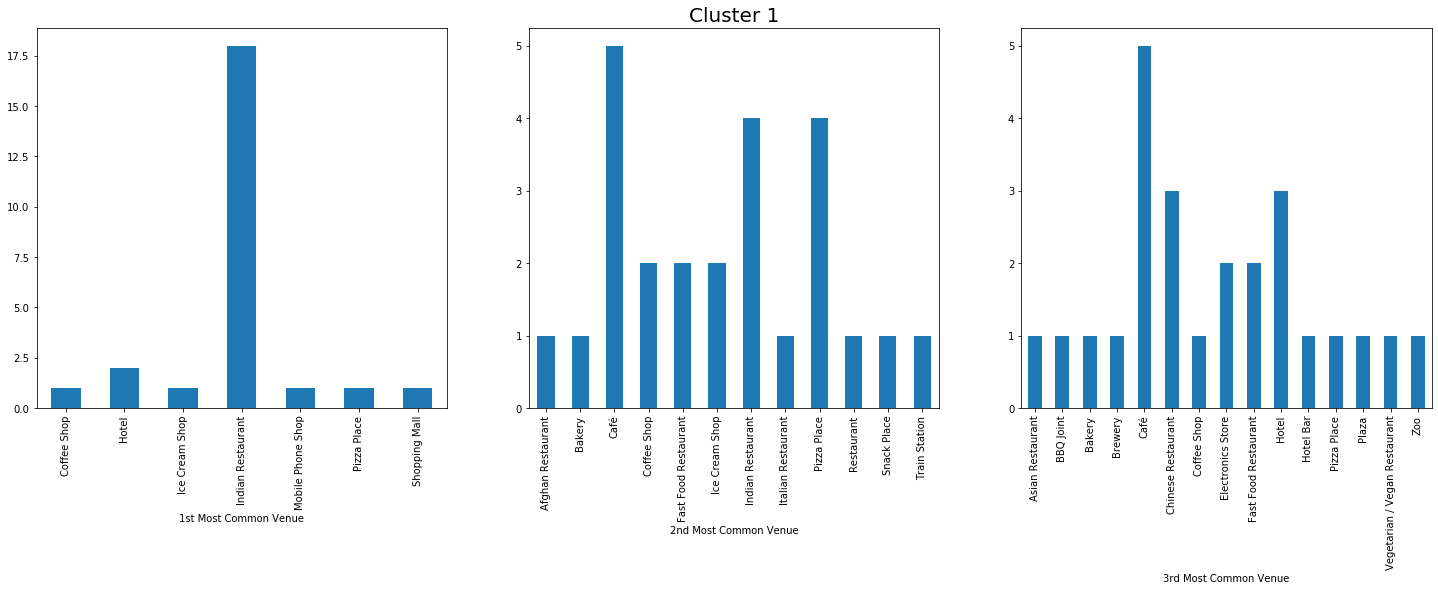

In [32]:
plt.subplot(131)
mv1a = cluster1.groupby(['1st Most Common Venue'])['1st Most Common Venue'].count()
mv1a.plot.bar()

plt.subplot(132)
mv1b = cluster1.groupby(['2nd Most Common Venue'])['2nd Most Common Venue'].count()
mv1b.plot.bar()
plt.title('Cluster 1',fontsize=20)

plt.subplot(133)
mv1c = cluster1.groupby(['3rd Most Common Venue'])['3rd Most Common Venue'].count()
mv1c.plot.bar(figsize=(25,7))

## Cluster 2

In [33]:
cluster2 = pnq_merged.loc[pnq_merged['Cluster Labels'] == 1, pnq_merged.columns[[1] + list(range(0, pnq_merged.shape[1]))]]
cluster2.drop(['cost','Latitude','Longitude'],axis = 1,inplace = True)

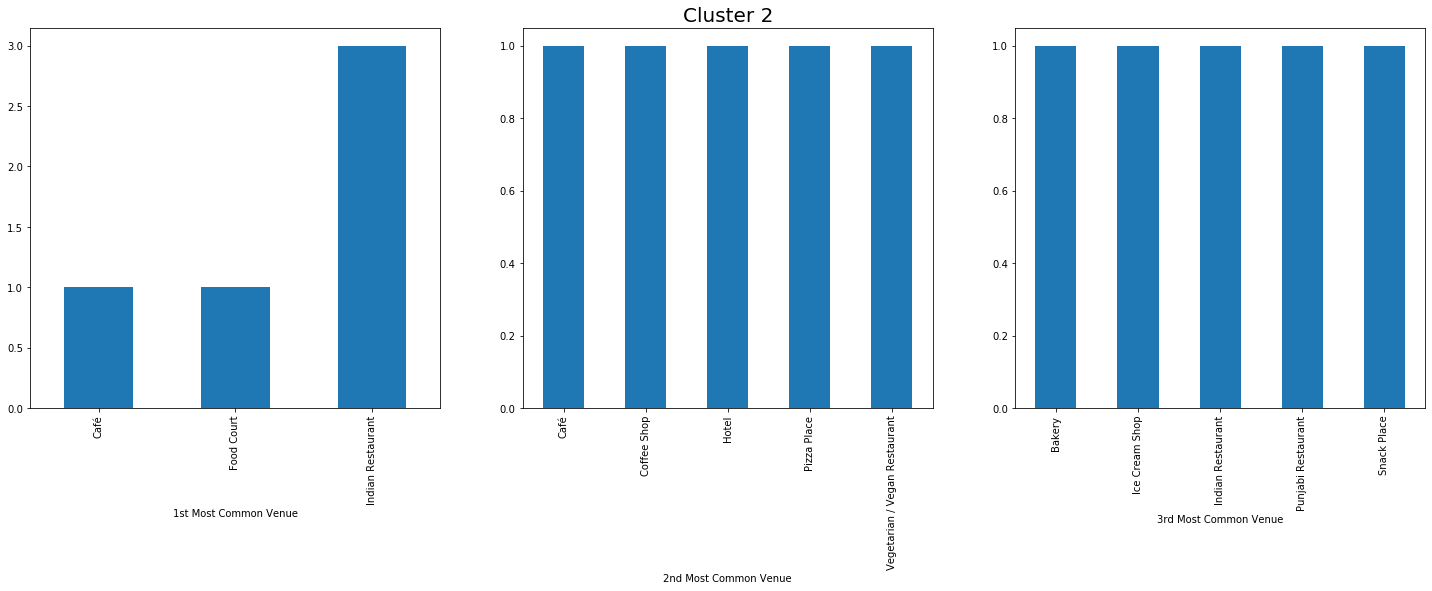

In [34]:
plt.subplot(131)
mv2a = cluster2.groupby(['1st Most Common Venue'])['1st Most Common Venue'].count()
mv2a.plot.bar()

plt.subplot(132)
mv2b = cluster2.groupby(['2nd Most Common Venue'])['2nd Most Common Venue'].count()
mv2b.plot.bar()
plt.title('Cluster 2',fontsize=20)

plt.subplot(133)
mv2c = cluster2.groupby(['3rd Most Common Venue'])['3rd Most Common Venue'].count()
mv2c.plot.bar(figsize=(25,7))


## Cluster 3

In [35]:
cluster3 = pnq_merged.loc[pnq_merged['Cluster Labels'] == 2, pnq_merged.columns[[1] + list(range(0, pnq_merged.shape[1]))]]
cluster3.drop(['cost','Latitude','Longitude'],axis = 1,inplace = True)


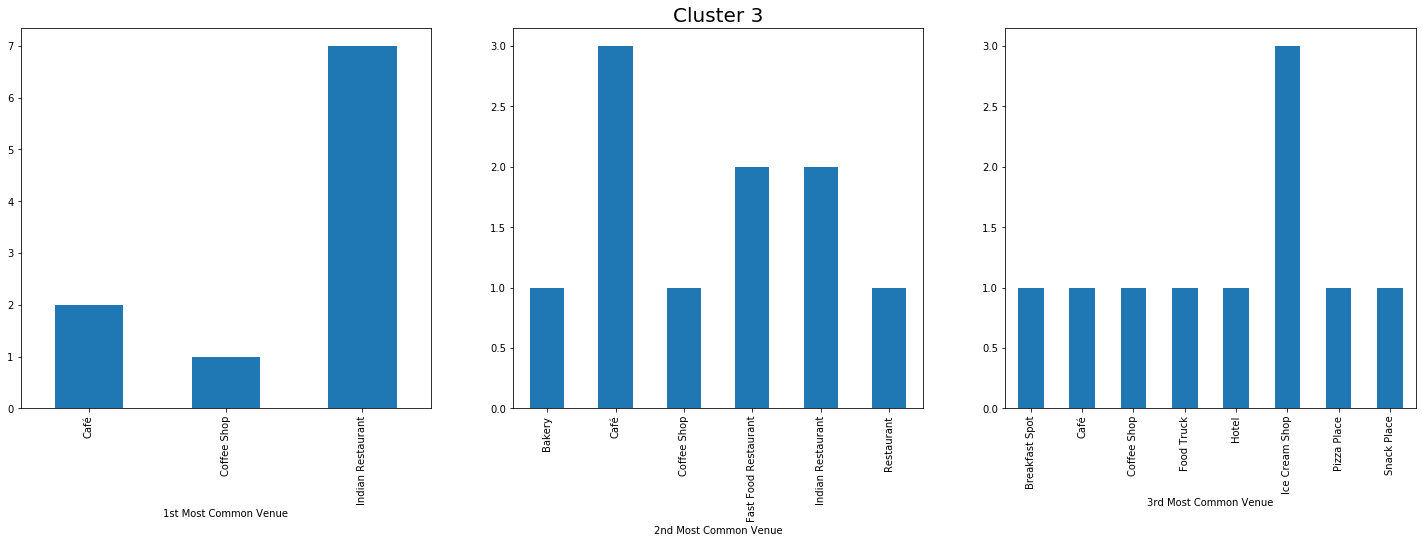

In [36]:
plt.subplot(131)
mv3a = cluster3.groupby(['1st Most Common Venue'])['1st Most Common Venue'].count()
mv3a.plot.bar()

plt.subplot(132)
mv3b = cluster3.groupby(['2nd Most Common Venue'])['2nd Most Common Venue'].count()
mv3b.plot.bar()
plt.title('Cluster 3',fontsize=20)

plt.subplot(133)
mv3c = cluster3.groupby(['3rd Most Common Venue'])['3rd Most Common Venue'].count()
mv3c.plot.bar(figsize=(25,7))

## Cluster 4

In [37]:
cluster4 = pnq_merged.loc[pnq_merged['Cluster Labels'] == 3, pnq_merged.columns[[1] + list(range(0, pnq_merged.shape[1]))]]
cluster4.drop(['cost','Latitude','Longitude'],axis = 1,inplace = True)

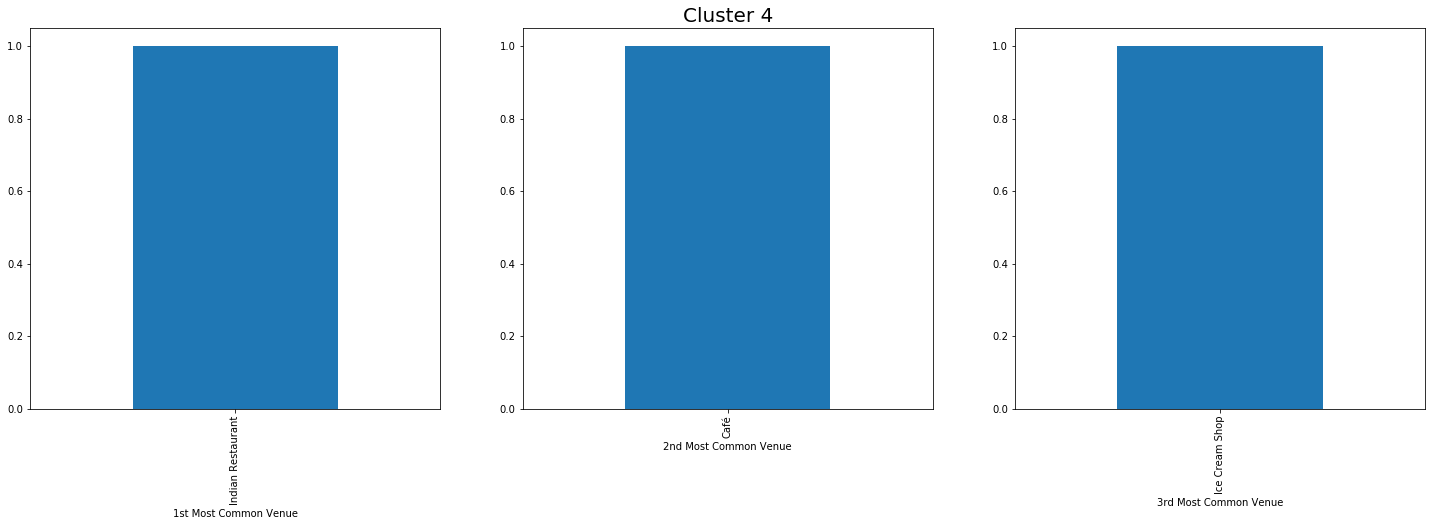

In [38]:
plt.subplot(131)
mv4a = cluster4.groupby(['1st Most Common Venue'])['1st Most Common Venue'].count()
mv4a.plot.bar()

plt.subplot(132)
mv4b = cluster4.groupby(['2nd Most Common Venue'])['2nd Most Common Venue'].count()
mv4b.plot.bar()
plt.title('Cluster 4',fontsize=20)

plt.subplot(133)
mv4c = cluster4.groupby(['3rd Most Common Venue'])['3rd Most Common Venue'].count()
mv4c.plot.bar(figsize=(25,7))

## Cluster 5

In [39]:
cluster5 = pnq_merged.loc[pnq_merged['Cluster Labels'] == 4, pnq_merged.columns[[1] + list(range(0, pnq_merged.shape[1]))]]
cluster5.drop(['cost','Latitude','Longitude'],axis = 1,inplace = True)

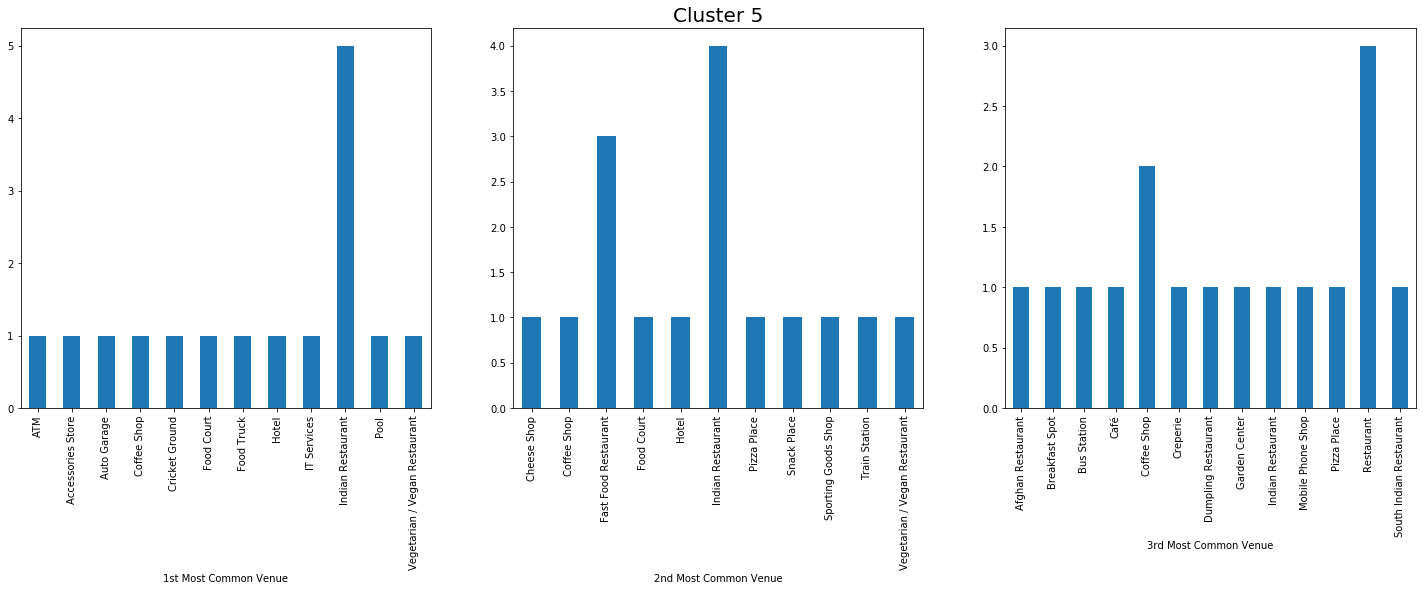

In [40]:
plt.subplot(131)
mv5a = cluster5.groupby(['1st Most Common Venue'])['1st Most Common Venue'].count()
mv5a.plot.bar()

plt.subplot(132)
mv5b = cluster5.groupby(['2nd Most Common Venue'])['2nd Most Common Venue'].count()
mv5b.plot.bar()
plt.title('Cluster 5',fontsize=20)

plt.subplot(133)
mv5c = cluster5.groupby(['3rd Most Common Venue'])['3rd Most Common Venue'].count()
mv5c.plot.bar(figsize=(25,7))


## Lets See the Cluster Wise Price variation

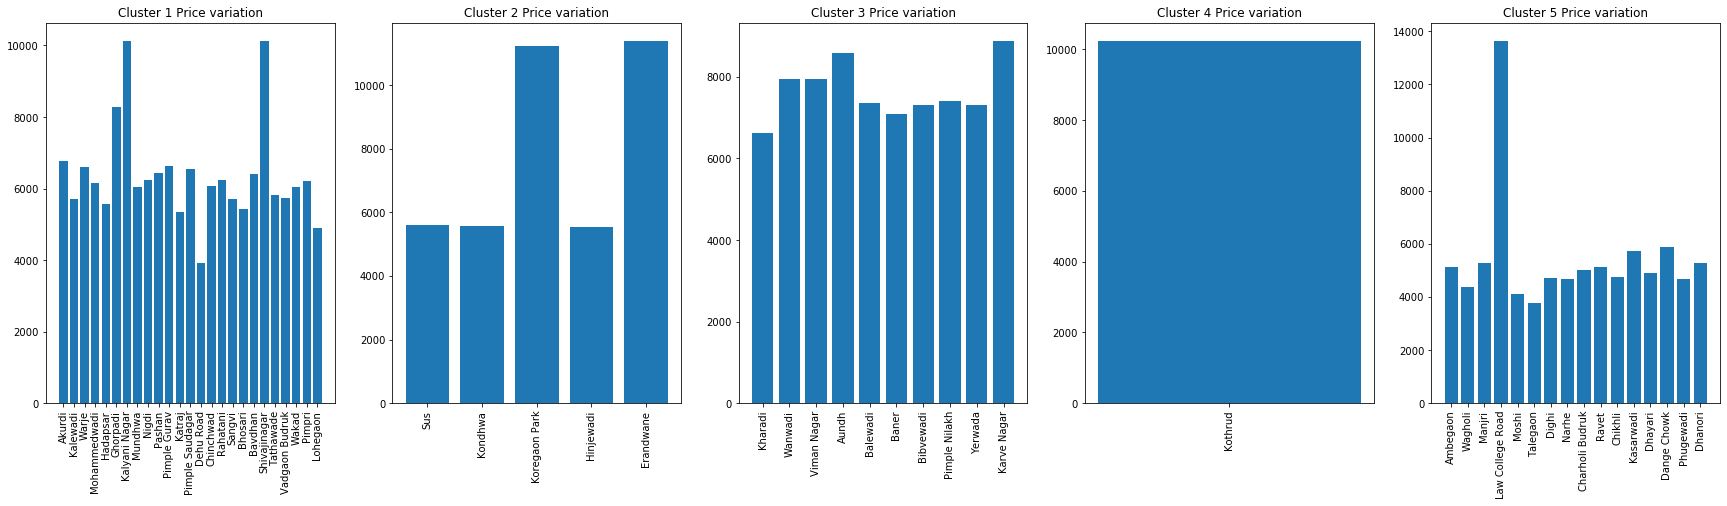

In [41]:
fig = plt.figure(figsize=(30, 7))
plt.subplot(151)
area1 = cluster1['Area']
cost1 = cluster1['Cost']
y_pos = np.arange(len(area1))
plt.bar(area1,cost1)
plt.xticks(y_pos,area1,rotation=90)
#plt.xticks(rotation=90)
plt.title('Cluster 1 Price variation')


plt.subplot(152)
area2 = cluster2['Area']
cost2 = cluster2['Cost']
y_pos2 = np.arange(len(area2))
plt.bar(area2,cost2)
plt.xticks(y_pos2,area2,rotation=90)
plt.title('Cluster 2 Price variation')


plt.subplot(153)
area3 = cluster3['Area']
cost3 = cluster3['Cost']
y_pos3 = np.arange(len(area3))
plt.bar(area3,cost3)
plt.xticks(y_pos3,area3,rotation=90)
plt.title('Cluster 3 Price variation')


plt.subplot(154)
area4 = cluster4['Area']
cost4 = cluster4['Cost']
y_pos4 = np.arange(len(area4))
plt.bar(area4,cost4)
plt.xticks(y_pos4,area4,rotation=90)
plt.title('Cluster 4 Price variation')


plt.subplot(155)
area5 = cluster5['Area']
cost5 = cluster5['Cost']
y_pos5 = np.arange(len(area5))
plt.bar(area5,cost5)
plt.xticks(y_pos5,area5,rotation=90)
plt.title('Cluster 5 Price variation')
plt.show()

# Observation and Results

From the clustered maps, data set and visualisation,the following conclusions and observation can be drawn
<ul>
    <li>Cluster 1 and 5 are mostly located far off from the city center with the exception of 2-3 localities 
    .These few localities however have their prices of lands. That is Cluster 1 and 5 if near to city centre have the high prices of land. </li>
    <li>Cluster 3 has a mid-priced land rate and are generally some where in middle of city center and outskirts of the City.They have a lot restraunts,cafe around them</li>
    <li>Cluster 1 has Shopping malls or other public entertainment places.Also Closer they are to city Centre, the higher are the prices of land</li>
    <li>Pune in general has a lot of restraunts and people love to visit them</li>
</ul>

# Conclusion
From the raw data we scraped out the useful data to create a model which clusters the neighbourhood, and helps us to draw conclusions about the land / property rates.We also studied the data to draw other important conclusions.
Though this model can made better by considering the following changes which I couldnt do in the current project due to lack of time.
<ul>
    <li>All the Restraunts and cafe be included in the same category</li>
    <li>Using more data about the city
    <li>The distance from city center column being added to dataframe
</ul>

## Thank You